In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange,uniform
from fancyimpute import KNN
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\annup\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\annup\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\annup\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\annup\Anaconda3\envs\py36\lib\site-packag

In [2]:
os.chdir('C:/Users/annup/Desktop/Edwisor') ## change directory

In [3]:
os.getcwd()

'C:\\Users\\annup\\Desktop\\Edwisor'

## Load and analyse data

In [4]:
marketing_train = pd.read_csv('marketing_tr.csv')

In [5]:
marketting_train = marketing_train.copy()

In [6]:
marketting_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           5610 non-null float64
profession        7414 non-null object
marital           7414 non-null object
schooling         5259 non-null object
default           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
dtypes: float64(7), int64(4), ob

In [7]:
marketting_train.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


## EDA

In [8]:
marketting_train['schooling'] = marketting_train['schooling'].replace('illiterate','unknown')
marketting_train['schooling'] = marketting_train['schooling'].replace(['basic.4y','basic.6y','basic.9y','high.school','professional.course'],'high.school')
marketting_train['default'] = marketting_train['default'].replace('yes','unknown')
marketting_train['marital'] = marketting_train['marital'].replace('unknown','married')
marketting_train['month'] = marketting_train['month'].replace(['sep','oct','mar','dec'],'dec')
marketting_train['month'] = marketting_train['month'].replace(['aug','jul','jun','may','nov'],'jun')
marketting_train['loan'] = marketting_train['loan'].replace('unknown','no')
marketting_train['profession'] = marketting_train['profession'].replace(['management','unknown','unemployed','admin.'],'admin.')
marketting_train['profession'] = marketting_train['profession'].replace(['blue-collar','housemaid','services','self-employed','entrepreneur','technician'],'blue-collar')

## Missing value analysis

In [9]:
marketting_train.isnull().sum()

custAge           1804
profession           0
marital              0
schooling         2155
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [10]:
missing_val = pd.DataFrame(marketting_train.isnull().sum())

In [11]:
missing_val

,0
custAge,1804
profession,0
marital,0
schooling,2155
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,711


In [12]:
# reset index
missing_val = missing_val.reset_index()

In [13]:
missing_val

,index,0
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [14]:
# Rename columns
missing_val = missing_val.rename(columns={'index':'Variable',0:'Missing_perc'})

In [15]:
missing_val

,Variable,Missing_perc
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [16]:
# calculate missing percentage
missing_val['Missing_perc'] = (missing_val['Missing_perc']/len(marketting_train))*100

In [17]:
missing_val

,Variable,Missing_perc
0,custAge,24.332344
1,profession,0.000000
2,marital,0.000000
3,schooling,29.066631
4,default,0.000000
5,housing,0.000000
6,loan,0.000000
7,contact,0.000000
8,month,0.000000
9,day_of_week,9.589965


In [18]:
# arrange the missing values in decreasing order
missing_val = missing_val.sort_values('Missing_perc',ascending=False).reset_index(drop=True)

In [19]:
missing_val

,Variable,Missing_perc
0,schooling,29.066631
1,custAge,24.332344
2,day_of_week,9.589965
3,previous,0.000000
4,pastEmail,0.000000
5,pmonths,0.000000
6,nr.employed,0.000000
7,euribor3m,0.000000
8,cons.conf.idx,0.000000
9,cons.price.idx,0.000000


So now we have to impute the missing values in 'schooling','custAge','day_of_week'

In [20]:
# Treat Missing Values
#1 Cust Age
# impute custAge missing values by mean method
df1 = marketting_train.copy()
df2 = marketting_train.copy()
df3 = marketting_train.copy()

In [21]:
mean = df1['custAge'].mean()

In [22]:
mean

40.009803921568626

In [23]:
median = df1['custAge'].median()

In [24]:
median

38.0

In [25]:
df1['custAge'] = df1['custAge'].fillna(mean)

In [26]:
df1['custAge'].isnull().sum()

0

In [27]:
# Impute schooling by mode value
mode = df1['schooling'].mode()

In [28]:
mode

0    high.school
dtype: object

In [29]:
df1['schooling'] = df1['schooling'].fillna('high.school')

In [30]:
df1['schooling'].isnull().sum()

0

In [31]:
#3 day_of_week is also imputed by mode method
mode_dayofweek = df1['day_of_week'].mode()

In [32]:
mode_dayofweek

0    mon
dtype: object

In [33]:
df1['day_of_week'] = df1['day_of_week'].fillna('mon')

In [34]:
df1['day_of_week'].isnull().sum()

0

In [35]:
df1.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [36]:
df1.head(20)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,admin.,single,university.degree,unknown,no,no,cellular,jun,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,40.009804,blue-collar,married,high.school,no,no,no,cellular,jun,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.000000,blue-collar,married,high.school,no,no,no,telephone,jun,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.000000,admin.,divorced,high.school,unknown,yes,yes,cellular,jun,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,40.009804,admin.,divorced,university.degree,no,yes,no,cellular,jun,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
5,47.000000,blue-collar,married,high.school,no,yes,no,telephone,jun,fri,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
6,35.000000,blue-collar,single,high.school,no,yes,no,telephone,jun,tue,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,yes
7,40.009804,blue-collar,married,high.school,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,no
8,28.000000,admin.,married,high.school,no,yes,no,cellular,jun,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,no
9,46.000000,blue-collar,married,high.school,no,yes,no,cellular,jun,mon,...,1,failure,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no


In [37]:
# KNN method of imputation
# Assign levels to the categories
lis1 = []
for i in range(0,df1.shape[1]):
    print(i)
    if(df1.iloc[:,i].dtypes=='object'):
        df1.iloc[:,i] = pd.Categorical(df1.iloc[:,i])
        df1.iloc[:,i] = df1.iloc[:,i].cat.codes
        df1.iloc[:,i] = df1.iloc[:,i].astype('object')
        
        lis1.append(df1.columns[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [38]:
# Knn Imputation in marketting_train
# assigning levels
lis2 = []
for i in range(0,marketting_train.shape[1]):
    if(marketting_train.iloc[:,i].dtypes=='object'):
        marketting_train.iloc[:,i] = pd.Categorical(marketting_train.iloc[:,i])
        marketting_train.iloc[:,i] = marketting_train.iloc[:,i].cat.codes
        marketting_train.iloc[:,i] = marketting_train.iloc[:,i].astype('object')
        
        lis2.append(marketting_train.columns[i])

In [39]:
# replace -1 values with na
for i in range(0,marketting_train.shape[1]):
    marketting_train.iloc[:,i] = marketting_train.iloc[:,i].replace(-1,np.nan)

In [40]:
marketting_train.isnull().sum()

custAge           1804
profession           0
marital              0
schooling         2155
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [41]:
# Apply KNN imputation algorithm
marketting_train = pd.DataFrame(KNN(k=3).fit_transform(marketting_train),columns=marketting_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 26.153
Imputing row 101/7414 with 1 missing, elapsed time: 29.860
Imputing row 201/7414 with 0 missing, elapsed time: 29.877
Imputing row 301/7414 with 1 missing, elapsed time: 29.891
Imputing row 401/7414 with 0 missing, elapsed time: 29.900
Imputing row 501/7414 with 0 missing, elapsed time: 29.909
Imputing row 601/7414 with 0 missing, elapsed time: 29.918
Imputing row 701/7414 with 1 missing, elapsed time: 29.926
Imputing row 801/7414 with 1 missing, elapsed time: 29.935
Imputing row 901/7414 with 1 missing, elapsed time: 29.942
Imputing row 1001/7414 with 0 missing, elapsed time: 29.951
Imputing row 1101/7414 with 1 missing, elapsed time: 29.961
Imputing row 1201/7414 with 1 missing, elapsed time: 29.970
Imputing row 1301/7414 with 1 missing, elapsed time: 29.980
Imputing row 1401/7414 with 0 missing, elapsed time: 29.989
Imputing row 1501/7414 with 1 missing, elapsed time: 29.997
Imputing row 1601/7414 with 1 missing, elapsed time:

In [42]:
marketting_train.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [43]:
# convert into proper data types
for i in lis2:
    marketting_train.loc[:,i] = marketting_train.loc[:,i].round()
    marketting_train.loc[:,i] = marketting_train.loc[:,i].astype('object')

In [44]:
marketting_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           7414 non-null float64
profession        7414 non-null object
marital           7414 non-null object
schooling         7414 non-null object
default           7414 non-null object
housing           7414 non-null object
loan              7414 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       7414 non-null object
campaign          7414 non-null float64
pdays             7414 non-null float64
previous          7414 non-null float64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null float64
responded         7414 non-null object
dtypes: float64(11), obj

In [45]:
marketting_train['custAge'] = marketting_train['custAge'].astype('int')

In [46]:
marketting_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55,0,2,1,1,0,0,0,2,1,...,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0
1,42,1,1,0,0,0,0,0,2,1,...,0.0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,0
2,42,1,1,0,0,0,0,1,2,1,...,0.0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0
3,55,0,0,1,1,2,1,0,2,4,...,0.0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,0
4,37,0,0,1,0,2,0,0,2,3,...,1.0,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,0


## Outlier analysis

In [47]:
# outlier analysis
marketting_train_outlier = marketting_train.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x207be181d30>,
 'caps': [<matplotlib.lines.Line2D at 0x207be197438>,
 'boxes': [<matplotlib.lines.Line2D at 0x207be181978>],
 'medians': [<matplotlib.lines.Line2D at 0x207be197ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x207be197e10>],
 'means': []}

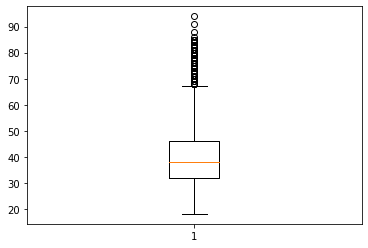

In [48]:
# so we have two datasets for outlier analysis
#Marketting_train
# plot boxplot to detect outliers
%matplotlib inline
plt.boxplot(marketting_train_outlier['custAge'])

In [49]:
# now lets extract numeric features to plot them in one go
cnames = ['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

In [50]:
# Detect and delete outliers from the data
for i in cnames:
    print(i)
    q75,q25 = np.percentile(marketting_train_outlier.loc[:,i],[75,25])
    iqr = q75 - q25
    
    minimum = q25-(iqr*1.5)
    maximum = q75+(iqr*1.5)
    print('IQR:',iqr)
    print('minimum:',minimum)
    print('maximum:',maximum)
    
    marketting_train_outlier = marketting_train_outlier.drop(marketting_train_outlier[marketting_train_outlier.loc[:,i]<minimum].index)
    marketting_train_outlier = marketting_train_outlier.drop(marketting_train_outlier[marketting_train_outlier.loc[:,i]>maximum].index)

custAge
IQR: 14.0
minimum: 11.0
maximum: 67.0
campaign
IQR: 2.0
minimum: -2.0
maximum: 6.0
pdays
IQR: 0.0
minimum: 999.0
maximum: 999.0
previous
IQR: 0.0
minimum: 0.0
maximum: 0.0
emp.var.rate
IQR: 2.5
minimum: -4.85
maximum: 5.15
cons.price.idx
IQR: 0.7939999999999969
minimum: 92.00900000000001
maximum: 95.185
cons.conf.idx
IQR: 6.300000000000004
minimum: -52.150000000000006
maximum: -26.949999999999992
euribor3m
IQR: 0.9409999999999998
minimum: 2.6095
maximum: 6.3735
nr.employed
IQR: 37.100000000000364
minimum: 5135.349999999999
maximum: 5283.750000000001
pmonths
IQR: 0.0
minimum: 999.0
maximum: 999.0
pastEmail
IQR: 0.0
minimum: 0.0
maximum: 0.0


In [51]:
marketting_train_outlier.shape

(4413, 22)

In [52]:
marketting_train_outlier.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55,0,2,1,1,0,0,0,2,1,...,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0
1,42,1,1,0,0,0,0,0,2,1,...,0.0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,0
2,42,1,1,0,0,0,0,1,2,1,...,0.0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0
3,55,0,0,1,1,2,1,0,2,4,...,0.0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,0
5,47,1,1,0,0,2,0,1,2,0,...,0.0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x207be213cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x207be21f3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x207be2139e8>],
 'medians': [<matplotlib.lines.Line2D at 0x207be21fa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x207be21fda0>],
 'means': []}

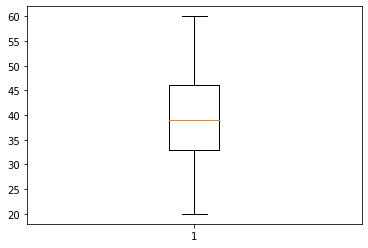

In [53]:
plt.boxplot(marketting_train_outlier['custAge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x207be2afba8>,
 'caps': [<matplotlib.lines.Line2D at 0x207be2962e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x207be2afa58>],
 'medians': [<matplotlib.lines.Line2D at 0x207be296978>],
 'fliers': [<matplotlib.lines.Line2D at 0x207be296cc0>],
 'means': []}

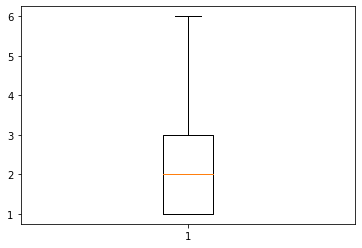

In [54]:
plt.boxplot(marketting_train_outlier['campaign'])

{'whiskers': [<matplotlib.lines.Line2D at 0x207be231a90>,
 'caps': [<matplotlib.lines.Line2D at 0x207be2421d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x207be231940>],
 'medians': [<matplotlib.lines.Line2D at 0x207be242860>],
 'fliers': [<matplotlib.lines.Line2D at 0x207be242ba8>],
 'means': []}

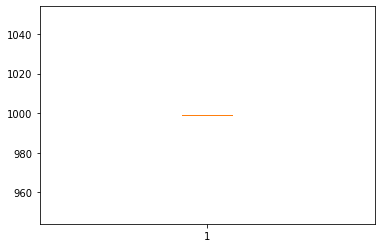

In [55]:
plt.boxplot(marketting_train_outlier['pdays'])

{'whiskers': [<matplotlib.lines.Line2D at 0x207bf3112e8>,
 'caps': [<matplotlib.lines.Line2D at 0x207bf3119e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x207bf311198>],
 'medians': [<matplotlib.lines.Line2D at 0x207bf3060b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x207bf306400>],
 'means': []}

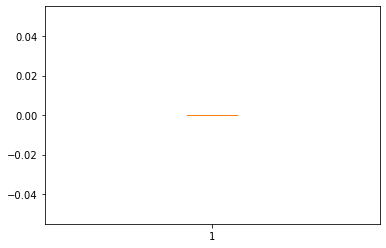

In [56]:
plt.boxplot(marketting_train_outlier['previous'])

{'whiskers': [<matplotlib.lines.Line2D at 0x207bf388a90>,
 'caps': [<matplotlib.lines.Line2D at 0x207bf3961d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x207bf388940>],
 'medians': [<matplotlib.lines.Line2D at 0x207bf396860>],
 'fliers': [<matplotlib.lines.Line2D at 0x207bf396ba8>],
 'means': []}

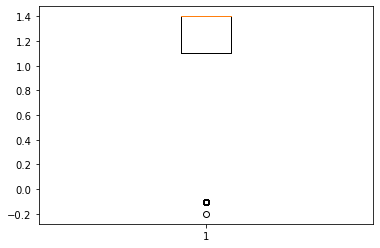

In [57]:
plt.boxplot(marketting_train_outlier['emp.var.rate'])

## Feature selection in python

In [58]:
# Correlation analysis
marketting_corr = marketting_train.copy()

In [59]:
df_corr = marketting_corr.loc[:,cnames]

In [60]:
df_corr.shape

(7414, 11)

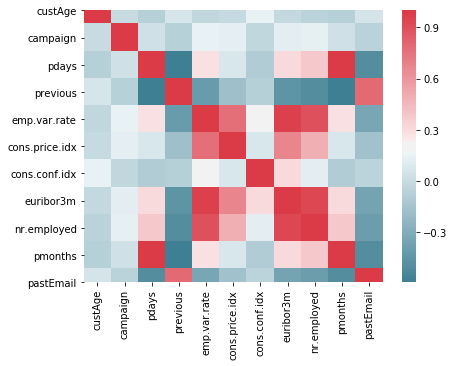

In [61]:
# set the width and height of the plot
f, ax = plt.subplots(figsize=(7,5))
# generate correlation matrix
corr = df_corr.corr()
# plot using seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

So from the heatmap we can see that 'pdays' and 'emp.var.rate' are highly correlated. SO we will remove them after chi-square-test

In [62]:
# chi-square test of independence
# save categorical variables
cat_names = ['profession','marital','schooling','default','housing','loan','contact','month','day_of_week','poutcome']

In [63]:
# loop for chi-square values
for i in cat_names:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(marketting_corr['responded'],marketting_corr[i]))
    print('p-values:',p)

profession
p-values: 1.6242589537712605e-34
marital
p-values: 4.693435664866768e-05
schooling
p-values: 4.071800591948163e-08
default
p-values: 1.626010224096433e-15
housing
p-values: 0.5469213692385477
loan
p-values: 0.09547438986454948
contact
p-values: 4.416434113838791e-36
month
p-values: 3.3492292613263237e-139
day_of_week
p-values: 0.038266146752773816
poutcome
p-values: 3.898575747043989e-181


So from the chi-square test we get to know that our 'loan' and 'housing' features are independent of our target variable, so now we have to remove ('loan','housing','pdays','emp.var.rate','day_of_week')

In [64]:
marketting_corr.shape

(7414, 22)

In [65]:
marketting_corr = marketting_corr.drop(['loan','housing','pdays','emp.var.rate','day_of_week'],axis=1)

In [66]:
marketting_corr.shape

(7414, 17)

So initially we have 22 variables now we have 17 variables left because we removed 5 unused variables using correlation and chi-square test.

## Feature Scaling

In [67]:
df_feature = marketting_corr.copy()

(array([  8.,   7.,  37.,  26., 155., 103., 333., 264., 313., 677., 322.,
        658., 319., 582., 280., 241., 501., 200., 439., 207., 333., 184.,
        156., 224., 118., 215., 102., 152.,  66.,  50.,  13.,   4.,  18.,
          7.,  10.,   4.,  22.,   3.,   4.,   7.,   5.,   8.,   4.,  16.,
          4.,   2.,   7.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([18.        , 19.43396226, 20.86792453, 22.30188679, 23.73584906,
        25.16981132, 26.60377358, 28.03773585, 29.47169811, 30.90566038,
        32.33962264, 33.77358491, 35.20754717, 36.64150943, 38.0754717 ,
        39.50943396, 40.94339623, 42.37735849, 43.81132075, 45.24528302,
        46.67924528, 48.11320755, 49.54716981, 50.98113208, 52.41509434,
        53.8490566 , 55.28301887, 56.71698113, 58.1509434 , 59.58490566,
        61.01886792, 62.45283019, 63.88679245, 65.32075472, 66.75471698,
        68.18867925, 69.62264151, 71.05660377, 72.49056604, 73.9245283 ,
        75.35849057, 76.79245283, 78.22641509, 79.660377

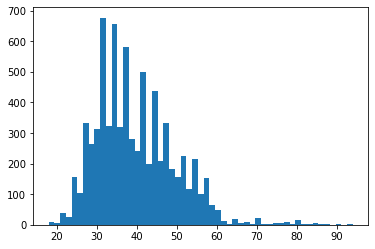

In [68]:
# Normality check
%matplotlib inline
plt.hist(df_feature['custAge'],bins='auto')

In [69]:
# now since out data is not normally distributed we will go with normallisation
cnames = ['custAge','previous','campaign','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

In [70]:
# Normalisation
for i in cnames:
    print(i)
    df_feature[i] = (df_feature[i] - min(df_feature[i]))/(max(df_feature[i])-min(df_feature[i]))

custAge
previous
campaign
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [71]:
df_feature.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.315789,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.250000,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0


In [72]:
# Standardisation
df_standardisation = marketting_corr.copy()

In [73]:
for i in cnames:
    print(i)
    df_standardisation[i] = (df_standardisation[i]-df_standardisation[i].mean())/df_standardisation[i].std()

custAge
previous
campaign
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [74]:
df_standardisation.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,1.532039,0,2,1,1,0,2,-0.563381,-0.356270,1,-0.640982,-0.309408,0.348370,0.418223,0.202109,-0.286829,0
1,0.221349,1,1,0,0,0,2,-0.563381,-0.356270,1,0.600493,-0.459952,0.789092,0.860031,0.202109,-0.286829,0
2,0.221349,1,1,0,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.730062,0.352568,0.202109,-0.286829,0
3,1.532039,0,0,1,1,0,2,-0.192331,-0.356270,1,0.600493,-0.459952,0.790239,0.860031,0.202109,-0.286829,0
4,-0.282762,0,0,1,0,0,2,0.920818,1.578809,0,-1.171807,-1.212672,-1.313650,-0.904465,0.202109,0.505772,0


## Sampling Technique

In [75]:
# Simple random sampling
df_simplesampling = df_feature.copy()

In [76]:
df_simplesampling.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.315789,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.250000,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0


In [77]:
df_simplesampling = df_simplesampling.sample(30)

In [78]:
df_simplesampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 5639 to 2148
Data columns (total 17 columns):
custAge           30 non-null float64
profession        30 non-null object
marital           30 non-null object
schooling         30 non-null object
default           30 non-null object
contact           30 non-null object
month             30 non-null object
campaign          30 non-null float64
previous          30 non-null float64
poutcome          30 non-null object
cons.price.idx    30 non-null float64
cons.conf.idx     30 non-null float64
euribor3m         30 non-null float64
nr.employed       30 non-null float64
pmonths           30 non-null float64
pastEmail         30 non-null float64
responded         30 non-null object
dtypes: float64(9), object(8)
memory usage: 4.2+ KB


In [79]:
# Systematic sampling
# cal the k value
df_systamatic = df_feature.copy()
k = round(len(df_systamatic)/3500)

In [80]:
k

2

In [81]:
# Generate a random no using simple random sampling
randnum = randrange(0,5)

In [82]:
df_systamatic = df_systamatic.iloc[randnum::k,:] # every kth row

In [83]:
df_systamatic.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
4,0.250000,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0
6,0.223684,1,2,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,1
8,0.131579,0,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,0
10,0.289474,0,1,1,0,0,2,0.051282,0.000000,1,0.484412,0.615063,0.981864,1.000000,1.0,0.000000,0


In [84]:
df_systamatic.shape

(3706, 17)

In [85]:
df_stratified = df_feature.copy()

In [86]:
# Stratified sampling
from sklearn.model_selection import train_test_split

In [87]:
# select categorical reference variable
y = df_stratified['profession']

In [88]:
# select subset using stratified sampling
Rest, Sample = train_test_split(df_stratified,test_size = 0.6,stratify = y)

In [89]:
Sample.shape

(4449, 17)

In [90]:
Rest.shape

(2965, 17)

In [91]:
Sample.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
1883,0.342105,1,1,0,0,1,2,0.000000,0.0,1,0.669135,0.338912,0.982544,1.000000,1.0000,0.0,0
2175,0.460526,2,1,0,1,1,2,0.051282,0.0,1,0.698753,0.602510,0.957153,0.859735,1.0000,0.0,0
5341,0.381579,0,1,1,0,1,2,0.025641,0.5,2,0.652767,0.451883,0.010882,0.170510,0.0001,0.0,0
1042,0.407895,1,1,0,1,0,2,0.000000,0.0,1,0.669135,0.338912,0.980050,1.000000,1.0000,0.0,0
5271,0.131579,1,2,0,0,0,2,0.025641,0.0,1,0.669135,0.338912,0.981183,1.000000,1.0000,0.0,0


## Decision Tree Classification

In [92]:
marketting_train = df_feature.copy()

In [93]:
marketting_train.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.315789,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.250000,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0


In [94]:
# Import libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [95]:
# Replace target categories with yes and no
marketting_train['responded'] = marketting_train['responded'].replace({1:'Yes',0:'No'})

In [96]:
marketting_train.head(20)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,No
1,0.315789,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,No
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,No
3,0.486842,0,0,1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,No
4,0.250000,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,No
5,0.381579,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,No
6,0.223684,1,2,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,Yes
7,0.315789,1,1,0,0,1,2,0.025641,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,No
8,0.131579,0,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,No
9,0.368421,1,1,0,0,0,2,0.025641,0.166667,0,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,No


In [97]:
marketting_train.shape

(7414, 17)

In [98]:
# Now divide data into train and test
X = marketting_train.values[:,0:16]
Y = marketting_train.values[:,16]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [99]:
Y_test.shape

(1483,)

In [100]:
# Decision Tree
classifier = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)

In [101]:
# Predict new test cases
y_pred = classifier.predict(X_test)

In [102]:
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [103]:
# Create a dot file in order to visualize our decision tree on https://webgraphviz.com/
#dotfile = open('pt.dot','w')
#df = tree.export_graphviz(classifier,out_file=dotfile,feature_names=marketting_train.columns)

In [104]:
# Evaluate the decision tree model using error metrics
# 1st method
# Build confusion metrics
from sklearn.metrics import confusion_matrix

In [105]:
CM = confusion_matrix(Y_test,y_pred)

In [106]:
CM

array([[1192,  114],
       [ 110,   67]], dtype=int64)

In [107]:
# 2nd method
CM2 = pd.crosstab(Y_test,y_pred)

In [108]:
CM2

col_0,No,Yes
row_0,,
No,1192,114
Yes,110,67


In [109]:
# Now calculate error metrics
TN = CM2.iloc[0,0]
FP = CM2.iloc[0,1]
FN = CM2.iloc[1,0]
TP = CM2.iloc[1,1]

In [110]:
TN

1192

In [111]:
FP

114

In [112]:
# Now calculate the accuracy
accuracy_score(Y_test,y_pred)*100

84.8954821308159

In [113]:
# False negative rate
FNR = (FN*100)/(FN+TP)
FNR

62.14689265536723

In [114]:
# DT results
# Accyracy = 84%
#FNR = 60%

## RandomForest

In [115]:
# import randomforest from sklearn
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500).fit(X_train,Y_train)

In [116]:
RF_predict = rf_model.predict(X_test)

In [117]:
# Build confusion matrix
cm = pd.crosstab(Y_test,RF_predict)

In [118]:
cm

col_0,No,Yes
row_0,,
No,1261,45
Yes,119,58


In [119]:
# Lets save TP,TN,FP,FN
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
# Check accuracy and FNR of the model
accuracy_score(Y_test,y_pred)
#FNR
FNR = (FN*100)/(FN+TP)
FNR

67.2316384180791

In [120]:
FNR

67.2316384180791

In [121]:
accuracy_score(Y_test,RF_predict)*100

88.94133513149022

In [122]:
# so our accuracy is increased to 89%
#FNR is 64

In [123]:
# after increasing the n_estimator to 500 our FNR reduced to 62%

## Grid search to find optimum parameters

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
# Create parameters grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [126]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [127]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8934412409374473 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


## Fitting the model with best parameters

In [128]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=500)

In [129]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
# Predict
rfc_pred = rfc.predict(X_test)

In [131]:
# confusion matrix
cm = pd.crosstab(Y_test,rfc_pred)
cm

col_0,No,Yes
row_0,,
No,1294,12
Yes,144,33


In [132]:
# Now calculate error metrics
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [133]:
# False negative rate
FNR = (FN*100)/(FN+TP)
FNR

81.35593220338983

In [134]:
# Print accuracy
print(accuracy_score(Y_test,rfc_pred))

0.894807821982468


## Logistic Regression

In [135]:
# Lets prepare data for logistic regression
# Change the target variable to 0 and 1
marketting_train['responded'] = marketting_train['responded'].replace('No',0)
marketting_train['responded'] = marketting_train['responded'].replace('Yes',1)

In [136]:
marketting_train_logit = pd.DataFrame(marketting_train['responded']) # first store the target variable

In [137]:
# Add continuous variables
marketting_train_logit = marketting_train_logit.join(marketting_train[cnames])

In [138]:
marketting_train_logit.head()

,responded,custAge,previous,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,0.486842,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000
1,0,0.315789,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000
2,0,0.315789,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000
3,0,0.486842,0.000000,0.025641,0.669135,0.338912,0.981183,1.000000,1.0,0.000000
4,0,0.250000,0.166667,0.102564,0.269680,0.192469,0.148946,0.512287,1.0,0.055556


In [139]:
# Create dummies for categorical variables
cat_names = ['profession','marital','schooling','default','contact','month','poutcome']

In [140]:
cat_names

['profession',
 'marital',
 'schooling',
 'default',
 'contact',
 'month',
 'poutcome']

In [141]:
for i in cat_names:
    temp = pd.get_dummies(marketting_train[i],prefix=i)
    marketting_train_logit = marketting_train_logit.join(temp)

In [142]:
marketting_train_logit.shape

(7414, 30)

In [143]:
marketting_train_logit.head()

,responded,custAge,previous,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,...,default_0.0,default_1.0,contact_0.0,contact_1.0,month_0.0,month_1.0,month_2.0,poutcome_0.0,poutcome_1.0,poutcome_2.0
0,0,0.486842,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,...,0,1,1,0,0,0,1,0,1,0
1,0,0.315789,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,...,1,0,1,0,0,0,1,0,1,0
2,0,0.315789,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,...,1,0,0,1,0,0,1,0,1,0
3,0,0.486842,0.000000,0.025641,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,...,0,1,1,0,0,0,1,0,1,0
4,0,0.250000,0.166667,0.102564,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,...,1,0,1,0,0,0,1,1,0,0


In [144]:
# create sample index
sample_index = np.random.rand(len(marketting_train_logit)) < 0.8
train = marketting_train_logit[sample_index]
test = marketting_train_logit[~sample_index]

In [145]:
# Select column index for independent variables
train_cols = train.columns[1:30]

In [146]:
import statsmodels.api as sm

In [147]:
# build the model
logit = sm.Logit(train['responded'],train[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.274413
         Iterations 9


In [148]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:              responded   No. Observations:                 5986
Model:                          Logit   Df Residuals:                     5963
Method:                           MLE   Df Model:                           22
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                  0.2187
Time:                        23:25:09   Log-Likelihood:                -1642.6
converged:                       True   LL-Null:                       -2102.4
Covariance Type:            nonrobust   LLR p-value:                2.546e-180
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
custAge            0.1859      0.409      0.455      0.649      -0.616       0.988
previous          -0.3693      0.969     -0.381      0.703      -2.268       1.530
campaign          -1.4919      0.939

In [149]:
# predict test data on our model
test['Actual_prob'] = logit.predict(test[train_cols])

In [150]:
test.head()

,responded,custAge,previous,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,...,default_1.0,contact_0.0,contact_1.0,month_0.0,month_1.0,month_2.0,poutcome_0.0,poutcome_1.0,poutcome_2.0,Actual_prob
10,0,0.289474,0.000000,0.051282,0.484412,0.615063,0.981864,1.000000,1.0,0.000000,...,0,1,0,0,0,1,0,1,0,0.058774
11,0,0.302632,0.000000,0.025641,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,...,0,1,0,0,0,1,0,1,0,0.050257
20,0,0.263158,0.166667,0.000000,0.269680,0.192469,0.146679,0.512287,1.0,0.055556,...,0,1,0,0,0,1,1,0,0,0.088524
34,0,0.473684,0.166667,0.102564,0.269680,0.192469,0.139651,0.512287,1.0,0.055556,...,0,1,0,0,0,1,1,0,0,0.100286
40,0,0.118421,0.000000,0.128205,0.669135,0.338912,0.980050,1.000000,1.0,0.000000,...,0,0,1,0,0,1,0,1,0,0.023437


In [151]:
# set the threshold values
test['Actual_val'] = 1
test.loc[test.Actual_prob < 0.5, 'Actual_val'] = 0

In [152]:
test['Actual_val'].value_counts()

0    1364
1      64
Name: Actual_val, dtype: int64

In [153]:
# build confusion matrix
cm = pd.crosstab(test['responded'],test['Actual_val'])

In [154]:
print(cm)

Actual_val     0   1
responded           
0           1243  17
1            121  47


In [155]:
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
FP = cm.iloc[0,1]
TP = cm.iloc[1,1]

In [156]:
# Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

90.33613445378151

In [157]:
# Accuracy = 88%

In [158]:
#FNR
(FN*100)/(FN+TP)

72.02380952380952

In [159]:
# FNR = 77%

## KNN 

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)

In [162]:
# Predict test score
knn_pred = knn_model.predict(X_test)

In [163]:
# Confusion matrix
cm = pd.crosstab(Y_test,knn_pred)

In [164]:
cm

col_0,No,Yes
row_0,,
No,1251,55
Yes,129,48


In [165]:
# Accuracy = 88%
accuracy_score(Y_test,knn_pred)

0.8759271746459879

In [166]:
# FNR = 76%
137/(137+43)

0.7611111111111111

In [167]:
# K= 7
knn_model_1 = KNeighborsClassifier(n_neighbors=7).fit(X_train,Y_train)

In [168]:
knn_model_1_pred = knn_model_1.predict(X_test)

In [169]:
cm2 = pd.crosstab(Y_test,knn_model_1_pred)
cm2

col_0,No,Yes
row_0,,
No,1277,29
Yes,135,42


In [170]:
# Accuracy = 89%
accuracy_score(Y_test,knn_model_1_pred)

0.8894133513149022

In [171]:
# FNR = 77%
139/(139+41)

0.7722222222222223

## Naive Bayes

In [172]:
# import naive bayes from sklearn library
from sklearn.naive_bayes import GaussianNB

In [173]:
nb_model = GaussianNB().fit(X_train,Y_train)

In [174]:
# predict test cases
nb_pred = nb_model.predict(X_test)

In [179]:
# Build Confusion matrix
cm = pd.crosstab(Y_test,nb_pred)

In [180]:
cm

col_0,No,Yes
row_0,,
No,1118,188
Yes,89,88


In [181]:
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [182]:
# Accuracy = 81%
accuracy_score(Y_test,nb_pred)*100

81.3216453135536

In [183]:
# FPR = 50%
FN/(FN+TP)

0.5028248587570622